In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mias-mammography/Info.txt
/kaggle/input/mias-mammography/all_mias_scans.h5
/kaggle/input/mias-mammography/all-mias.tar.gz
/kaggle/input/mias-mammography/all-mias/mdb152.pgm
/kaggle/input/mias-mammography/all-mias/mdb088.pgm
/kaggle/input/mias-mammography/all-mias/mdb113.pgm
/kaggle/input/mias-mammography/all-mias/mdb182.pgm
/kaggle/input/mias-mammography/all-mias/mdb239.pgm
/kaggle/input/mias-mammography/all-mias/mdb066.pgm
/kaggle/input/mias-mammography/all-mias/mdb220.pgm
/kaggle/input/mias-mammography/all-mias/mdb292.pgm
/kaggle/input/mias-mammography/all-mias/mdb286.pgm
/kaggle/input/mias-mammography/all-mias/mdb103.pgm
/kaggle/input/mias-mammography/all-mias/mdb194.pgm
/kaggle/input/mias-mammography/all-mias/mdb275.pgm
/kaggle/input/mias-mammography/all-mias/mdb060.pgm
/kaggle/input/mias-mammography/all-mias/mdb067.pgm
/kaggle/input/mias-mammography/all-mias/mdb023.pgm
/kaggle/input/mias-mammography/all-mias/mdb073.pgm
/kaggle/input/mias-mammography/all-mias/mdb307.p

# Feature Extraction using Neural Networks

# Classification using standard Classifiers

## Neural Networks used:

### 1.VGG-16
### 2.VGG-19
### 3.Resnet50
### 4.Resnet101
### 5.MobileNetv2
### 6.MobileNet
### 7.InceptionV3
### 8.InceptionResntV2
### 9.DenseNet169
### 10.DenseNet121
### 11.XceptionNet

## Classifiers used:

### 1.ANN ( Custom Architecture)
### 2.SVM ==> SVC
### 3.RandomForest
### 4.AdaBoost
### 5.Xgboost
### 6.KNN
#Note:Rerun Notebbok after finishing with one neural Network


In [2]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
# import pydot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

print("All modules have been imported")

All modules have been imported


In [3]:
info=pd.read_csv("../input/mias-mammography/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)
info.SEVERITY.fillna(0)

0      B
1      B
2      0
3      0
4      B
      ..
325    0
326    0
327    0
328    0
329    0
Name: SEVERITY, Length: 330, dtype: object

In [4]:
from PIL import Image
import glob
x= []
for filename in sorted(glob.glob("../input/mias-mammography/all-mias/*.pgm")): 
    img=cv2.imread(filename)
    img =cv2.resize(img,(224, 224))
    x.append(img)


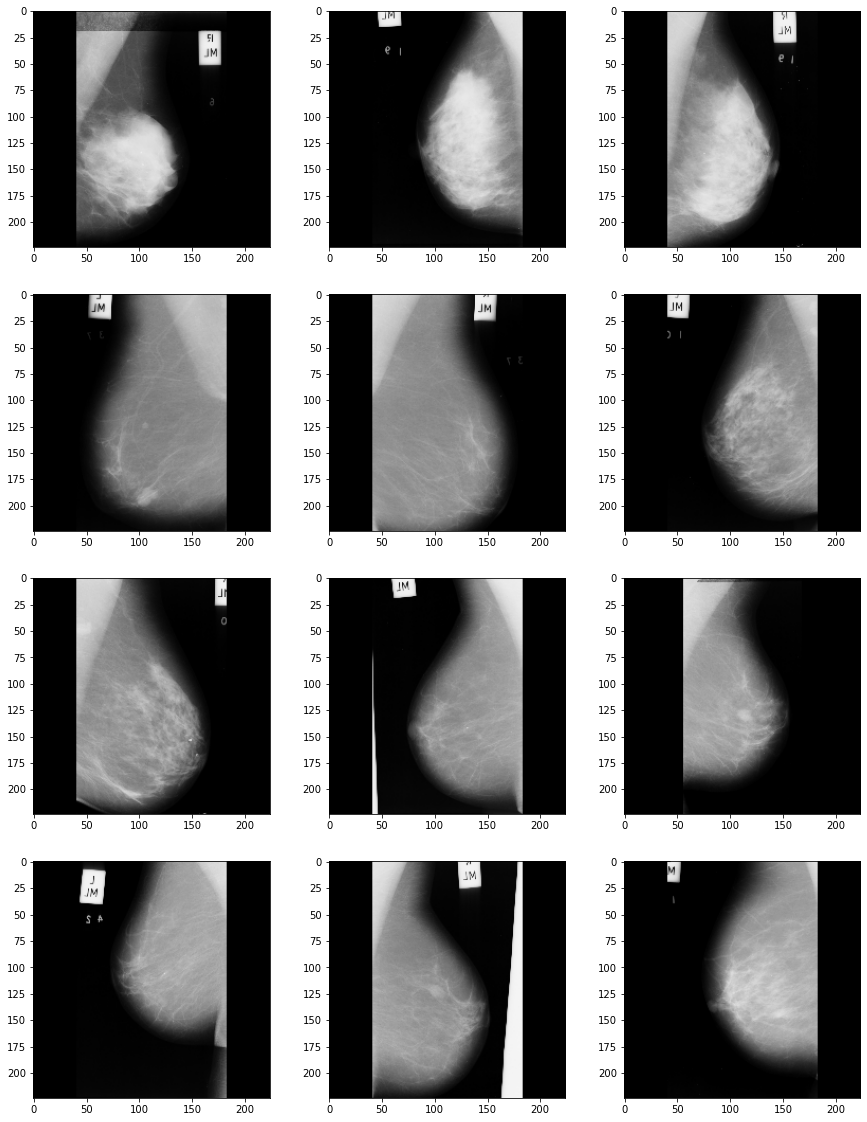

In [5]:
fig=plt.figure(figsize=(15,20))
columns = 3
rows = 4
for i in range(1, columns*rows +1):
    img = np.random.randint(10)
    fig.add_subplot(rows, columns, i)
    plt.imshow(x[i])
plt.show()

In [6]:
# Image Augmentation
no_angles = 10
url = '/kaggle/input/mias-mammography/all-mias/'

def save_dictionary(path,data):
        print('saving catalog...')
        #open('u.item', encoding="utf-8")
        import json
        with open(path,'w') as outfile:
            json.dump(str(data), fp=outfile)
        # save to file:
        print(' catalog saved')

In [7]:
# train_test_split_datagen=ImageDataGenerator("augmentations such as flip,brightness range,etc....")
# val_datagen=ImageDataGenerator("augmentations such as flip,brightness range,etc....")
# test_datagen=ImageDataGenerator("augmentations such as flip,brightness range,etc....")
def read_image():
        print("Reading images")
        import cv2
        info = {}
        for i in range(322):
            if i<9:
                image_name='mdb00'+str(i+1)
            elif i<99:
                image_name='mdb0'+str(i+1)
            else:
                image_name = 'mdb' + str(i+1)
            image_address= url+image_name+'.pgm'
            img = cv2.imread(image_address,1)
            img = cv2.resize(img, (224,224))
            rows, cols,channel = img.shape
            info[image_name]={}
            for angle in range(0,no_angles,8):
                M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1) 
                img_rotated = cv2.warpAffine(img, M, (cols, rows))
                info[image_name][angle]=img_rotated
        return (info)


In [8]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)

def get_script_path():
    return os.path.dirname(os.path.realpath(sys.argv[0]))    

def read_lable():
    filename = url+'Info.txt'
    text_all = open(filename).read()
    #print(text_all)
    lines=text_all.split('\n')
    info={}
    for line in lines:
        words=line.split(' ')
        if len(words)>1:
            if (words[1] == 'G'):
                info[words[0]] = {}
                for angle in range(no_angles):
                    info[words[0]][angle] = 2
            if (words[1] == 'D'):
                info[words[0]] = {}
                for  angle in range(no_angles):
                    info[words[0]][angle] = 1
            if (words[1] == 'F'):
                info[words[0]] = {}
                for  angle in range(no_angles):
                    info[words[0]][angle] = 0
            
    return (info)

In [9]:
import numpy as np
lable_info=read_lable()
image_info=read_image()
ids=lable_info.keys() 
#del lable_info['Truth-Data:']
X=[]
Y=[]
for id in ids:
    for angle in range(0,no_angles,8):
        X.append(image_info[id][angle])
        Y.append(lable_info[id][angle])
X=np.array(X)
Y=np.array(Y)
#Y=to_categorical(Y,3)
x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.3, random_state=42)
print(len(x_train),len(x_val),len(x_test))

Reading images
450 135 59


# ANN Model

In [10]:
#Defining our ANN Model
ann_model=Sequential()
ann_model.add(Dense(8, input_dim=3, kernel_initializer = 'uniform', activation = 'relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout( 0.2))
ann_model.add(Dense(16, kernel_initializer = 'HeUniform', activation = 'relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout( 0.2))
ann_model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu' ))
ann_model.add(BatchNormalization())
ann_model.add(Dropout( 0.2))
ann_model.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu' ))
ann_model.add(BatchNormalization())
ann_model.add(Dropout( 0.2))
ann_model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu' ))
ann_model.add(BatchNormalization())
ann_model.add(Dropout( 0.2))
ann_model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu' ))
ann_model.add(BatchNormalization())
ann_model.add(Dropout( 0.2))
ann_model.add(Dense(3,activation='softmax'))
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 32        
_________________________________________________________________
batch_normalization (BatchNo (None, 8)                 32        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                5

In [11]:
# #LEARNING_RATE = 1e-4
# #OPTIMIZER = RMSprop(lr=LEARNING_RATE,decay=1e-2)
# LOSS = 'binary_crossentropy'
# METRICS = [
#     'accuracy', 
#     'AUC'
# ] 

# Creating Classification Pipeline

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)

In [13]:
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()


In [14]:
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

# ResNet-50

In [347]:
base_model= ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [348]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 56.220000000000006%
------------------------ Validation Set Metrics------------------------

Accuracy score : 39.26%
------------------------ Test Set Metrics------------------------

Accuracy score : 45.76%
F1_score : 0.44
Kappa Score : 0.2 
Recall score: 0.46
Precision score : 0.49
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 42.22%
------------------------ Validation Set Metrics------------------------

Accuracy score : 39.26%
------------------------ Test Set Metrics------------------------

Accuracy score : 30.509999999999998%
F1_score : 0.27
Kappa Score : 0.01 
Recall score: 

In [351]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
ann_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))



Epoch 1/10
15/15 [==============================] - 2s 40ms/step - loss: 1.1556 - accuracy: 0.4015 - val_loss: 1.0999 - val_accuracy: 0.2889
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 1.2270 - accuracy: 0.3693 - val_loss: 1.0986 - val_accuracy: 0.3852
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 1.1967 - accuracy: 0.3433 - val_loss: 1.1000 - val_accuracy: 0.2889
Epoch 4/10
15/15 [==============================] - 0s 12ms/step - loss: 1.2791 - accuracy: 0.3330 - val_loss: 1.1002 - val_accuracy: 0.2889
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 1.2222 - accuracy: 0.3327 - val_loss: 1.0996 - val_accuracy: 0.2889
Epoch 6/10
15/15 [==============================] - 0s 10ms/step - loss: 1.2336 - accuracy: 0.3731 - val_loss: 1.0985 - val_accuracy: 0.3704
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 1.1878 - accuracy: 0.2903 - val_loss: 1.0987 - val_accuracy: 0.2889
Epoch 8/10
15

In [352]:
print("Performance Report:")
y_pred1=ann_model.predict_classes(test_features)
y_test1=[np.argmax(x) for x in test_y]
y_pred_prb1=ann_model.predict_proba(test_features)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test1, y_pred1),4))
print('Precision score is :', np.round(metrics.precision_score(y_test1, y_pred1, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test1,y_pred1, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test1, y_pred1, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test1, y_pred_prb1,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test1, y_pred1),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test1, y_pred1,target_names=target))

Performance Report:
Accuracy score is : 0.339
Precision score is : 0.1149
Recall score is : 0.339
F1 Score is : 0.1716
ROC AUC Score is : 0.5071
Cohen Kappa Score: 0.0
		Classification Report:
               precision    recall  f1-score   support

           G       0.00      0.00      0.00        15
           F       0.00      0.00      0.00        24
           D       0.34      1.00      0.51        20

    accuracy                           0.34        59
   macro avg       0.11      0.33      0.17        59
weighted avg       0.11      0.34      0.17        59



In [ ]:
# Let us use pycaret now
#!pip install 

# VGG-16

In [726]:
base_model= VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
# x = base_model.output
# x = Dropout(0.2)(x)
# x = Flatten()(x)
# x = BatchNormalization()(x)
# x = Dense(16,kernel_initializer='he_uniform')(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# predictions = Dense(3, activation='softmax')(x)

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

In [727]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [728]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 56.220000000000006%
------------------------ Validation Set Metrics------------------------

Accuracy score : 36.3%
------------------------ Test Set Metrics------------------------

Accuracy score : 44.07%
F1_score : 0.45
Kappa Score : 0.17 
Recall score: 0.44
Precision score : 0.48
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 46.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 40.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 40.68%
F1_score : 0.3
Kappa Score : 0.06 
Recall score: 0.41
Precision s

In [729]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
ann_model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'],)
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))


Epoch 1/10
15/15 [==============================] - 2s 29ms/step - loss: 1.1068 - accuracy: 0.2575 - val_loss: 1.0958 - val_accuracy: 0.3778
Epoch 2/10
15/15 [==============================] - 0s 14ms/step - loss: 1.1029 - accuracy: 0.3039 - val_loss: 1.0918 - val_accuracy: 0.4519
Epoch 3/10
15/15 [==============================] - 0s 15ms/step - loss: 1.0955 - accuracy: 0.3311 - val_loss: 1.0908 - val_accuracy: 0.3852
Epoch 4/10
15/15 [==============================] - 0s 15ms/step - loss: 1.0898 - accuracy: 0.3908 - val_loss: 1.0877 - val_accuracy: 0.4370
Epoch 5/10
15/15 [==============================] - 0s 16ms/step - loss: 1.0889 - accuracy: 0.3776 - val_loss: 1.0863 - val_accuracy: 0.4370
Epoch 6/10
15/15 [==============================] - 0s 16ms/step - loss: 1.0915 - accuracy: 0.3442 - val_loss: 1.0858 - val_accuracy: 0.4296
Epoch 7/10
15/15 [==============================] - 0s 11ms/step - loss: 1.0830 - accuracy: 0.4142 - val_loss: 1.0854 - val_accuracy: 0.4222
Epoch 8/10
15

In [730]:
print("Performance Report:")
y_pred2=ann_model.predict_classes(test_features)
y_test2=[np.argmax(x) for x in test_y]
y_pred_prb2=ann_model.predict_proba(test_features)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test2, y_pred2),4))
print('Precision score is :', np.round(metrics.precision_score(y_test2, y_pred2, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test2,y_pred2, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test2, y_pred2, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test2, y_pred_prb2,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test2, y_pred2),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test2, y_pred2,target_names=target))



Performance Report:
Accuracy score is : 0.4407
Precision score is : 0.2604
Recall score is : 0.4407
F1 Score is : 0.3031
ROC AUC Score is : 0.6056
Cohen Kappa Score: 0.0851
		Classification Report:
               precision    recall  f1-score   support

           G       0.29      0.13      0.18        15
           F       0.46      1.00      0.63        24
           D       0.00      0.00      0.00        20

    accuracy                           0.44        59
   macro avg       0.25      0.38      0.27        59
weighted avg       0.26      0.44      0.30        59



# VGG-19

In [582]:
base_model= VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output

x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)

predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

In [583]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [584]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 59.11%
------------------------ Validation Set Metrics------------------------

Accuracy score : 36.3%
------------------------ Test Set Metrics------------------------

Accuracy score : 44.07%
F1_score : 0.41
Kappa Score : 0.17 
Recall score: 0.44
Precision score : 0.42
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 41.56%
------------------------ Validation Set Metrics------------------------

Accuracy score : 38.519999999999996%
------------------------ Test Set Metrics------------------------

Accuracy score : 35.589999999999996%
F1_score : 0.25
Kappa Score : 0.1 
Recall score: 0

In [585]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
ann_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))



Epoch 1/10
15/15 [==============================] - 2s 26ms/step - loss: 1.1043 - accuracy: 0.3177 - val_loss: 1.1068 - val_accuracy: 0.2963
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 1.1006 - accuracy: 0.3089 - val_loss: 1.1033 - val_accuracy: 0.3481
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0880 - accuracy: 0.3455 - val_loss: 1.1008 - val_accuracy: 0.3481
Epoch 4/10
15/15 [==============================] - 0s 11ms/step - loss: 1.0835 - accuracy: 0.3597 - val_loss: 1.1007 - val_accuracy: 0.3630
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0867 - accuracy: 0.4022 - val_loss: 1.1039 - val_accuracy: 0.3778
Epoch 6/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0964 - accuracy: 0.3423 - val_loss: 1.1009 - val_accuracy: 0.3852
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0947 - accuracy: 0.3657 - val_loss: 1.0942 - val_accuracy: 0.3778
Epoch 8/10
15/

In [586]:
print("Performance Report:")
y_pred1=ann_model.predict_classes(test_features)
y_test1=[np.argmax(x) for x in test_y]
y_pred_prb1=ann_model.predict_proba(test_features)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test1, y_pred1),4))
print('Precision score is :', np.round(metrics.precision_score(y_test1, y_pred1, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test1,y_pred1, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test1, y_pred1, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test1, y_pred_prb1,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test1, y_pred1),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test1, y_pred1,target_names=target))



Performance Report:
Accuracy score is : 0.3559
Precision score is : 0.2158
Recall score is : 0.3559
F1 Score is : 0.2445
ROC AUC Score is : 0.5194
Cohen Kappa Score: 0.1089
		Classification Report:
               precision    recall  f1-score   support

           G       0.35      1.00      0.52        15
           F       0.00      0.00      0.00        24
           D       0.38      0.30      0.33        20

    accuracy                           0.36        59
   macro avg       0.24      0.43      0.28        59
weighted avg       0.22      0.36      0.24        59



# ResNet-101

In [587]:
base_model= ResNet101(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)

In [588]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [589]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 56.00000000000001%
------------------------ Validation Set Metrics------------------------

Accuracy score : 42.22%
------------------------ Test Set Metrics------------------------

Accuracy score : 33.900000000000006%
F1_score : 0.31
Kappa Score : 0.03 
Recall score: 0.34
Precision score : 0.4
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 46.44%
------------------------ Validation Set Metrics------------------------

Accuracy score : 37.04%
------------------------ Test Set Metrics------------------------

Accuracy score : 44.07%
F1_score : 0.45
Kappa Score : 0.16 
Recall score: 0

In [590]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
ann_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))



Epoch 1/10
15/15 [==============================] - 2s 27ms/step - loss: 1.0962 - accuracy: 0.3490 - val_loss: 1.0942 - val_accuracy: 0.3556
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0958 - accuracy: 0.3306 - val_loss: 1.0943 - val_accuracy: 0.3481
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0926 - accuracy: 0.3664 - val_loss: 1.0949 - val_accuracy: 0.3407
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0972 - accuracy: 0.3610 - val_loss: 1.0954 - val_accuracy: 0.3481
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0969 - accuracy: 0.3218 - val_loss: 1.0946 - val_accuracy: 0.3556
Epoch 6/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0938 - accuracy: 0.3370 - val_loss: 1.0949 - val_accuracy: 0.3778
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0970 - accuracy: 0.3797 - val_loss: 1.0950 - val_accuracy: 0.3630
Epoch 8/10
15

In [591]:
print("Performance Report:")
y_pred3=ann_model.predict_classes(test_features)
y_test3=[np.argmax(x) for x in test_y]
y_pred_prb3=ann_model.predict_proba(test_features)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test3, y_pred3),4))
print('Precision score is :', np.round(metrics.precision_score(y_test3, y_pred3, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test3,y_pred3, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test3, y_pred3, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test3, y_pred_prb3,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test3, y_pred3),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test3, y_pred3,target_names=target))

Performance Report:
Accuracy score is : 0.3051
Precision score is : 0.6447
Recall score is : 0.3051
F1 Score is : 0.217
ROC AUC Score is : 0.526
Cohen Kappa Score: 0.054
		Classification Report:
               precision    recall  f1-score   support

           G       0.27      0.93      0.42        15
           F       1.00      0.04      0.08        24
           D       0.50      0.15      0.23        20

    accuracy                           0.31        59
   macro avg       0.59      0.38      0.24        59
weighted avg       0.64      0.31      0.22        59



# MobileNetV2

In [594]:
base_model= MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = Dense(8,activation='softmax')(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)


In [595]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [596]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 58.89%
------------------------ Validation Set Metrics------------------------

Accuracy score : 42.22%
------------------------ Test Set Metrics------------------------

Accuracy score : 38.98%
F1_score : 0.37
Kappa Score : 0.1 
Recall score: 0.39
Precision score : 0.4
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 43.11%
------------------------ Validation Set Metrics------------------------

Accuracy score : 42.22%
------------------------ Test Set Metrics------------------------

Accuracy score : 45.76%
F1_score : 0.45
Kappa Score : 0.18 
Recall score: 0.46
Precision score : 0.47

In [597]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
ann_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))


Epoch 1/10
15/15 [==============================] - 2s 26ms/step - loss: 1.0920 - accuracy: 0.3309 - val_loss: 1.0910 - val_accuracy: 0.4000
Epoch 2/10
15/15 [==============================] - 0s 11ms/step - loss: 1.0861 - accuracy: 0.3843 - val_loss: 1.0911 - val_accuracy: 0.3630
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0904 - accuracy: 0.3719 - val_loss: 1.0923 - val_accuracy: 0.3852
Epoch 4/10
15/15 [==============================] - 0s 9ms/step - loss: 1.0779 - accuracy: 0.3961 - val_loss: 1.0937 - val_accuracy: 0.3630
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0922 - accuracy: 0.3304 - val_loss: 1.0973 - val_accuracy: 0.2963
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 1.0705 - accuracy: 0.4088 - val_loss: 1.0974 - val_accuracy: 0.3037
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0648 - accuracy: 0.4020 - val_loss: 1.0970 - val_accuracy: 0.3111
Epoch 8/10
15/1

In [598]:
print("Performance Report:")
y_pred4=ann_model.predict_classes(test_features)
y_test4=[np.argmax(x) for x in test_y]
y_pred_prb4=ann_model.predict_proba(test_features)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test4, y_pred4),4))
print('Precision score is :', np.round(metrics.precision_score(y_test4, y_pred4, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test4,y_pred4, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test4, y_pred4, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test4, y_pred_prb4,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test4, y_pred4),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test4, y_pred4,target_names=target))


Performance Report:
Accuracy score is : 0.322
Precision score is : 0.111
Recall score is : 0.322
F1 Score is : 0.1651
ROC AUC Score is : 0.5698
Cohen Kappa Score: -0.0234
		Classification Report:
               precision    recall  f1-score   support

           G       0.00      0.00      0.00        15
           F       0.00      0.00      0.00        24
           D       0.33      0.95      0.49        20

    accuracy                           0.32        59
   macro avg       0.11      0.32      0.16        59
weighted avg       0.11      0.32      0.17        59



# MobileNet

In [618]:
base_model= MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)

predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)


In [619]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [620]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 53.779999999999994%
------------------------ Validation Set Metrics------------------------

Accuracy score : 35.56%
------------------------ Test Set Metrics------------------------

Accuracy score : 35.589999999999996%
F1_score : 0.35
Kappa Score : 0.06 
Recall score: 0.36
Precision score : 0.38
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 43.11%
------------------------ Validation Set Metrics------------------------

Accuracy score : 37.78%
------------------------ Test Set Metrics------------------------

Accuracy score : 42.370000000000005%
F1_score : 0.39
Kappa Score : 0.14 


In [621]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
ann_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))


Epoch 1/10
15/15 [==============================] - 2s 28ms/step - loss: 1.1051 - accuracy: 0.2953 - val_loss: 1.1024 - val_accuracy: 0.3556
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 1.0969 - accuracy: 0.3297 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0975 - accuracy: 0.3602 - val_loss: 1.0979 - val_accuracy: 0.3481
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0893 - accuracy: 0.3909 - val_loss: 1.0983 - val_accuracy: 0.3481
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0965 - accuracy: 0.3637 - val_loss: 1.0993 - val_accuracy: 0.3111
Epoch 6/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0901 - accuracy: 0.3759 - val_loss: 1.1008 - val_accuracy: 0.2963
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0916 - accuracy: 0.4042 - val_loss: 1.1004 - val_accuracy: 0.2815
Epoch 8/10
15/

In [622]:
print("Performance Report:")
y_pred5=ann_model.predict_classes(test_features)
y_test5=[np.argmax(x) for x in test_y]
y_pred_prb5=ann_model.predict_proba(test_features)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test5, y_pred5),4))
print('Precision score is :', np.round(metrics.precision_score(y_test5, y_pred5, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test5,y_pred5, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test5, y_pred5, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test5, y_pred_prb5,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test5, y_pred5),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test5, y_pred5,target_names=target))


Performance Report:
Accuracy score is : 0.2712
Precision score is : 0.4327
Recall score is : 0.2712
F1 Score is : 0.202
ROC AUC Score is : 0.4617
Cohen Kappa Score: 0.0043
		Classification Report:
               precision    recall  f1-score   support

           G       0.24      0.80      0.36        15
           F       0.50      0.04      0.08        24
           D       0.50      0.15      0.23        20

    accuracy                           0.27        59
   macro avg       0.41      0.33      0.22        59
weighted avg       0.43      0.27      0.20        59



# InceptionV3

In [115]:
base_model= InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)


In [116]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [117]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 56.00000000000001%
------------------------ Validation Set Metrics------------------------

Accuracy score : 34.07%
------------------------ Test Set Metrics------------------------

Accuracy score : 47.46%
F1_score : 0.47
Kappa Score : 0.23 
Recall score: 0.47
Precision score : 0.55
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 44.440000000000005%
------------------------ Validation Set Metrics------------------------

Accuracy score : 40.0%
------------------------ Test Set Metrics------------------------

Accuracy score : 37.29%
F1_score : 0.37
Kappa Score : 0.09 
Recall score: 0

In [118]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
ann_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))


Epoch 1/10
15/15 [==============================] - 2s 30ms/step - loss: 1.1072 - accuracy: 0.3004 - val_loss: 1.0974 - val_accuracy: 0.3704
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 1.1096 - accuracy: 0.3232 - val_loss: 1.1045 - val_accuracy: 0.3481
Epoch 3/10
15/15 [==============================] - 0s 9ms/step - loss: 1.0931 - accuracy: 0.3647 - val_loss: 1.1072 - val_accuracy: 0.3778
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0897 - accuracy: 0.3723 - val_loss: 1.1200 - val_accuracy: 0.3556
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0992 - accuracy: 0.3634 - val_loss: 1.1149 - val_accuracy: 0.3556
Epoch 6/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0906 - accuracy: 0.3425 - val_loss: 1.0976 - val_accuracy: 0.3926
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 1.1091 - accuracy: 0.3364 - val_loss: 1.0902 - val_accuracy: 0.3778
Epoch 8/10
15/1

In [119]:
print("Performance Report:")
y_pred6=ann_model.predict_classes(test_features)
y_test6=[np.argmax(x) for x in test_y]
y_pred_prb6=ann_model.predict_proba(test_features)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test6, y_pred6),4))
print('Precision score is :', np.round(metrics.precision_score(y_test6, y_pred6, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test6,y_pred6, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test6, y_pred6, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test6, y_pred_prb6,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test6, y_pred6),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test6, y_pred6,target_names=target))


Performance Report:
Accuracy score is : 0.3559
Precision score is : 0.3572
Recall score is : 0.3559
F1 Score is : 0.2945
ROC AUC Score is : 0.5632
Cohen Kappa Score: 0.0815
		Classification Report:
               precision    recall  f1-score   support

           G       0.33      0.87      0.47        15
           F       0.47      0.29      0.36        24
           D       0.25      0.05      0.08        20

    accuracy                           0.36        59
   macro avg       0.35      0.40      0.31        59
weighted avg       0.36      0.36      0.29        59



# InceptionResNetV2

In [673]:
base_model= InceptionResNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)


In [674]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [675]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 46.0%
------------------------ Validation Set Metrics------------------------

Accuracy score : 39.26%
------------------------ Test Set Metrics------------------------

Accuracy score : 35.589999999999996%
F1_score : 0.3
Kappa Score : -0.04 
Recall score: 0.36
Precision score : 0.29
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 42.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 45.93%
------------------------ Test Set Metrics------------------------

Accuracy score : 55.93%
F1_score : 0.53
Kappa Score : 0.31 
Recall score: 0.56
Precisio

In [676]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
ann_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))


Epoch 1/10
15/15 [==============================] - 2s 27ms/step - loss: 1.0998 - accuracy: 0.3187 - val_loss: 1.0899 - val_accuracy: 0.4296
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0985 - accuracy: 0.3391 - val_loss: 1.0905 - val_accuracy: 0.3481
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0951 - accuracy: 0.3753 - val_loss: 1.0875 - val_accuracy: 0.3852
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0976 - accuracy: 0.3734 - val_loss: 1.0876 - val_accuracy: 0.3852
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0998 - accuracy: 0.3299 - val_loss: 1.0852 - val_accuracy: 0.3852
Epoch 6/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0957 - accuracy: 0.3932 - val_loss: 1.0814 - val_accuracy: 0.3852
Epoch 7/10
15/15 [==============================] - 0s 9ms/step - loss: 1.0874 - accuracy: 0.4109 - val_loss: 1.0792 - val_accuracy: 0.3556
Epoch 8/10
15/

In [677]:
print("Performance Report:")
y_pred7=ann_model.predict_classes(test_features)
y_test7=[np.argmax(x) for x in test_y]
y_pred_prb7=ann_model.predict_proba(test_features)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test7, y_pred7),4))
print('Precision score is :', np.round(metrics.precision_score(y_test7, y_pred7, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test7,y_pred7, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test7, y_pred7, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test7, y_pred_prb7,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test7, y_pred7),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test7, y_pred7,target_names=target))


Performance Report:
Accuracy score is : 0.5593
Precision score is : 0.5389
Recall score is : 0.5593
F1 Score is : 0.534
ROC AUC Score is : 0.6863
Cohen Kappa Score: 0.3065
		Classification Report:
               precision    recall  f1-score   support

           G       0.43      0.20      0.27        15
           F       0.58      0.75      0.65        24
           D       0.57      0.60      0.59        20

    accuracy                           0.56        59
   macro avg       0.53      0.52      0.50        59
weighted avg       0.54      0.56      0.53        59



# DenseNet169

In [653]:
base_model= DenseNet169(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)


In [654]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [655]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 58.220000000000006%
------------------------ Validation Set Metrics------------------------

Accuracy score : 31.85%
------------------------ Test Set Metrics------------------------

Accuracy score : 49.15%
F1_score : 0.5
Kappa Score : 0.24 
Recall score: 0.49
Precision score : 0.54
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 39.33%
------------------------ Validation Set Metrics------------------------

Accuracy score : 43.7%
------------------------ Test Set Metrics------------------------

Accuracy score : 40.68%
F1_score : 0.38
Kappa Score : 0.13 
Recall score: 0.41
Precision

In [656]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
ann_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))


Epoch 1/10
15/15 [==============================] - 2s 27ms/step - loss: 1.1151 - accuracy: 0.2921 - val_loss: 1.0998 - val_accuracy: 0.3481
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 1.0990 - accuracy: 0.3377 - val_loss: 1.0956 - val_accuracy: 0.4074
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0916 - accuracy: 0.3904 - val_loss: 1.0903 - val_accuracy: 0.4222
Epoch 4/10
15/15 [==============================] - 0s 9ms/step - loss: 1.0986 - accuracy: 0.3373 - val_loss: 1.0894 - val_accuracy: 0.4074
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0972 - accuracy: 0.3437 - val_loss: 1.0896 - val_accuracy: 0.3926
Epoch 6/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0942 - accuracy: 0.3583 - val_loss: 1.0922 - val_accuracy: 0.3704
Epoch 7/10
15/15 [==============================] - 0s 9ms/step - loss: 1.1051 - accuracy: 0.3667 - val_loss: 1.0948 - val_accuracy: 0.3852
Epoch 8/10
15/15

In [657]:
print("Performance Report:")
y_pred8=ann_model.predict_classes(test_features)
y_test8=[np.argmax(x) for x in test_y]
y_pred_prb8=ann_model.predict_proba(test_features)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test8, y_pred8),4))
print('Precision score is :', np.round(metrics.precision_score(y_test8, y_pred8, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test8,y_pred8, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test8, y_pred8, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test8, y_pred_prb8,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test8, y_pred8),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test8, y_pred8,target_names=target))


Performance Report:
Accuracy score is : 0.4068
Precision score is : 0.6207
Recall score is : 0.4068
F1 Score is : 0.3447
ROC AUC Score is : 0.5704
Cohen Kappa Score: 0.1338
		Classification Report:
               precision    recall  f1-score   support

           G       0.34      0.80      0.48        15
           F       0.48      0.46      0.47        24
           D       1.00      0.05      0.10        20

    accuracy                           0.41        59
   macro avg       0.61      0.44      0.35        59
weighted avg       0.62      0.41      0.34        59



# DenseNet121

In [648]:
base_model= DenseNet121(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(16,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)


In [649]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [650]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 58.67%
------------------------ Validation Set Metrics------------------------

Accuracy score : 37.78%
------------------------ Test Set Metrics------------------------

Accuracy score : 42.370000000000005%
F1_score : 0.42
Kappa Score : 0.14 
Recall score: 0.42
Precision score : 0.45
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 41.56%
------------------------ Validation Set Metrics------------------------

Accuracy score : 42.96%
------------------------ Test Set Metrics------------------------

Accuracy score : 40.68%
F1_score : 0.41
Kappa Score : 0.1 
Recall score: 0.41
Precisio

In [651]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
ann_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))


Epoch 1/10
15/15 [==============================] - 2s 26ms/step - loss: 1.1046 - accuracy: 0.3139 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0991 - accuracy: 0.3443 - val_loss: 1.0982 - val_accuracy: 0.3481
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0967 - accuracy: 0.3380 - val_loss: 1.0989 - val_accuracy: 0.3037
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0946 - accuracy: 0.3489 - val_loss: 1.0978 - val_accuracy: 0.3407
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0892 - accuracy: 0.3997 - val_loss: 1.0968 - val_accuracy: 0.3778
Epoch 6/10
15/15 [==============================] - 0s 12ms/step - loss: 1.0968 - accuracy: 0.3416 - val_loss: 1.0930 - val_accuracy: 0.4222
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0986 - accuracy: 0.3369 - val_loss: 1.0914 - val_accuracy: 0.4148
Epoch 8/10
15

In [652]:
print("Performance Report:")
y_pred9=ann_model.predict_classes(test_features)
y_test9=[np.argmax(x) for x in test_y]
y_pred_prb9=ann_model.predict_proba(test_features)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test9, y_pred9),4))
print('Precision score is :', np.round(metrics.precision_score(y_test9, y_pred9, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test9,y_pred9, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test9, y_pred9, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test9, y_pred_prb9,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test9, y_pred9),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test9, y_pred9,target_names=target))


Performance Report:
Accuracy score is : 0.4576
Precision score is : 0.5033
Recall score is : 0.4576
F1 Score is : 0.4686
ROC AUC Score is : 0.6226
Cohen Kappa Score: 0.1921
		Classification Report:
               precision    recall  f1-score   support

           G       0.30      0.40      0.34        15
           F       0.69      0.46      0.55        24
           D       0.43      0.50      0.47        20

    accuracy                           0.46        59
   macro avg       0.47      0.45      0.45        59
weighted avg       0.50      0.46      0.47        59



# XceptionNet

In [638]:
base_model= Xception(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)
predictions = Dense(3, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)


In [639]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier",
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier(),
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [640]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 53.559999999999995%
------------------------ Validation Set Metrics------------------------

Accuracy score : 44.440000000000005%
------------------------ Test Set Metrics------------------------

Accuracy score : 47.46%
F1_score : 0.47
Kappa Score : 0.22 
Recall score: 0.47
Precision score : 0.48
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 44.89%
------------------------ Validation Set Metrics------------------------

Accuracy score : 51.849999999999994%
------------------------ Test Set Metrics------------------------

Accuracy score : 45.76%
F1_score : 0.45
Kappa Score : 0.15 


In [641]:
train_y=to_categorical(y_train,3)
val_y=to_categorical(y_val,3)
test_y=to_categorical(y_test,3)
ann_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = ann_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = ann_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = ann_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))


Epoch 1/10
15/15 [==============================] - 2s 26ms/step - loss: 1.1205 - accuracy: 0.2777 - val_loss: 1.0858 - val_accuracy: 0.3778
Epoch 2/10
15/15 [==============================] - 0s 10ms/step - loss: 1.1058 - accuracy: 0.3021 - val_loss: 1.0783 - val_accuracy: 0.3852
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0927 - accuracy: 0.3531 - val_loss: 1.0738 - val_accuracy: 0.3926
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0890 - accuracy: 0.3553 - val_loss: 1.0639 - val_accuracy: 0.3926
Epoch 5/10
15/15 [==============================] - 0s 10ms/step - loss: 1.0839 - accuracy: 0.4332 - val_loss: 1.0600 - val_accuracy: 0.3926
Epoch 6/10
15/15 [==============================] - 0s 11ms/step - loss: 1.0779 - accuracy: 0.4047 - val_loss: 1.0562 - val_accuracy: 0.3926
Epoch 7/10
15/15 [==============================] - 0s 12ms/step - loss: 1.0672 - accuracy: 0.4012 - val_loss: 1.0550 - val_accuracy: 0.3926
Epoch 8/10
15

In [642]:
print("Performance Report:")
y_pred10=ann_model.predict_classes(test_features)
y_test10=[np.argmax(x) for x in test_y]
y_pred_prb10=ann_model.predict_proba(test_features)
target=["G","F","D"]
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test10, y_pred10),4))
print('Precision score is :', np.round(metrics.precision_score(y_test10, y_pred10, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test10,y_pred10, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test10, y_pred10, average='weighted'),4))
print('ROC AUC Score is :', np.round(metrics.roc_auc_score(y_test10, y_pred_prb10,multi_class='ovo', average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test10, y_pred10),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test10, y_pred10,target_names=target))


Performance Report:
Accuracy score is : 0.4746
Precision score is : 0.3105
Recall score is : 0.4746
F1 Score is : 0.3577
ROC AUC Score is : 0.6052
Cohen Kappa Score: 0.1548
		Classification Report:
               precision    recall  f1-score   support

           G       0.45      0.33      0.38        15
           F       0.48      0.96      0.64        24
           D       0.00      0.00      0.00        20

    accuracy                           0.47        59
   macro avg       0.31      0.43      0.34        59
weighted avg       0.31      0.47      0.36        59

